# Final Mission

In your final mission in this machine learning journey, you will try to guess how many clusters the data you will be working with has. To do this, you will use several clustering algorithms and heuristics. For now, two things: classes in the data are roughly balanced; you will need the following modules and libraries.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.cluster.hierarchy as shc

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

Load the `X_train.csv` file as a `Pandas` dataframe.

In [14]:
X_train = pd.read_csv('X_train.csv')
X_train.head()

,variance,skewness,kurtosis,entropy
0,1.95720,-5.11530,8.61270,-1.42970
1,0.12126,0.22347,-0.47327,0.97024
2,3.99940,0.90427,1.16930,1.68920
3,3.81970,8.99510,-4.38300,-4.03270
4,3.46470,-3.91720,3.97460,0.36119


## K-Means and The Elbow Method

Implement the **elbow method**, using **K.Means**, and make a guess regarding the number of cluster that the data has. Do this in the following cell.

c:\Users\eme_p\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


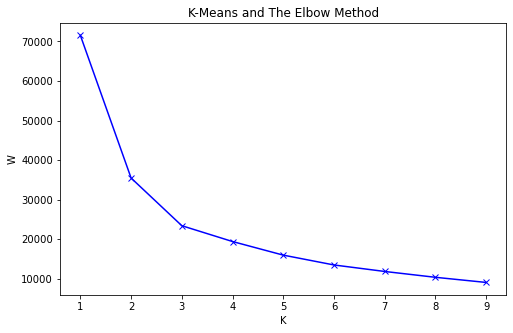

In [15]:

W = []
K = range(1,10) # Numero de grupos a probar
for test in K:
    kmeans = KMeans(n_clusters=test)
    kmeans.fit(X_train)
    W.append(kmeans.inertia_)
plt.figure(figsize=(8,5))
plt.plot(K,W, 'bx-')
plt.xlabel('K')
plt.ylabel('W')
plt.title('K-Means and The Elbow Method')
plt.show()

According to this method, how many clusters do you think you are dealing with? Justify your answer.

**Answer:**
Consideramos que se encuentran 3 grupos dentro de los datos, esto debido a que definitivamente tenemos una tendencia a disminuir la W con respecto a K, cuando tenemos 2 grupos, despues nosotros consideramos que vuelve a decrementar de forma importante cuando probamos con 3 grupos, pero de ahi en adelante, no consideramos que sean caídas drasticas, por lo que concluimos que tenemos 3 grupos dentro de nuestro set de datos.

## Heriarchical Clustering and The Dendrograms

Use the `AgglomerativeClustering` object to perform a hierarchical clustering using a bottom up approach. Keep in mind that the linkage criteria determines the metric used for the merge strategy:

- **Ward:** It minimizes the sum of squared differences within all clusters. 

- **Maximum or complete linkage:** It minimizes the maximum distance between observations of pairs of clusters.

- **Average linkage:** It minimizes the average of the distances between all observations of pairs of clusters.

- **Single linkage:** It minimizes the distance between the closest observations of pairs of clusters.

Use these four options to plot the four possible dendrograms that you can have. Write the code to do this in the following cell.

In [16]:
X_train.head()

,variance,skewness,kurtosis,entropy
0,1.95720,-5.11530,8.61270,-1.42970
1,0.12126,0.22347,-0.47327,0.97024
2,3.99940,0.90427,1.16930,1.68920
3,3.81970,8.99510,-4.38300,-4.03270
4,3.46470,-3.91720,3.97460,0.36119


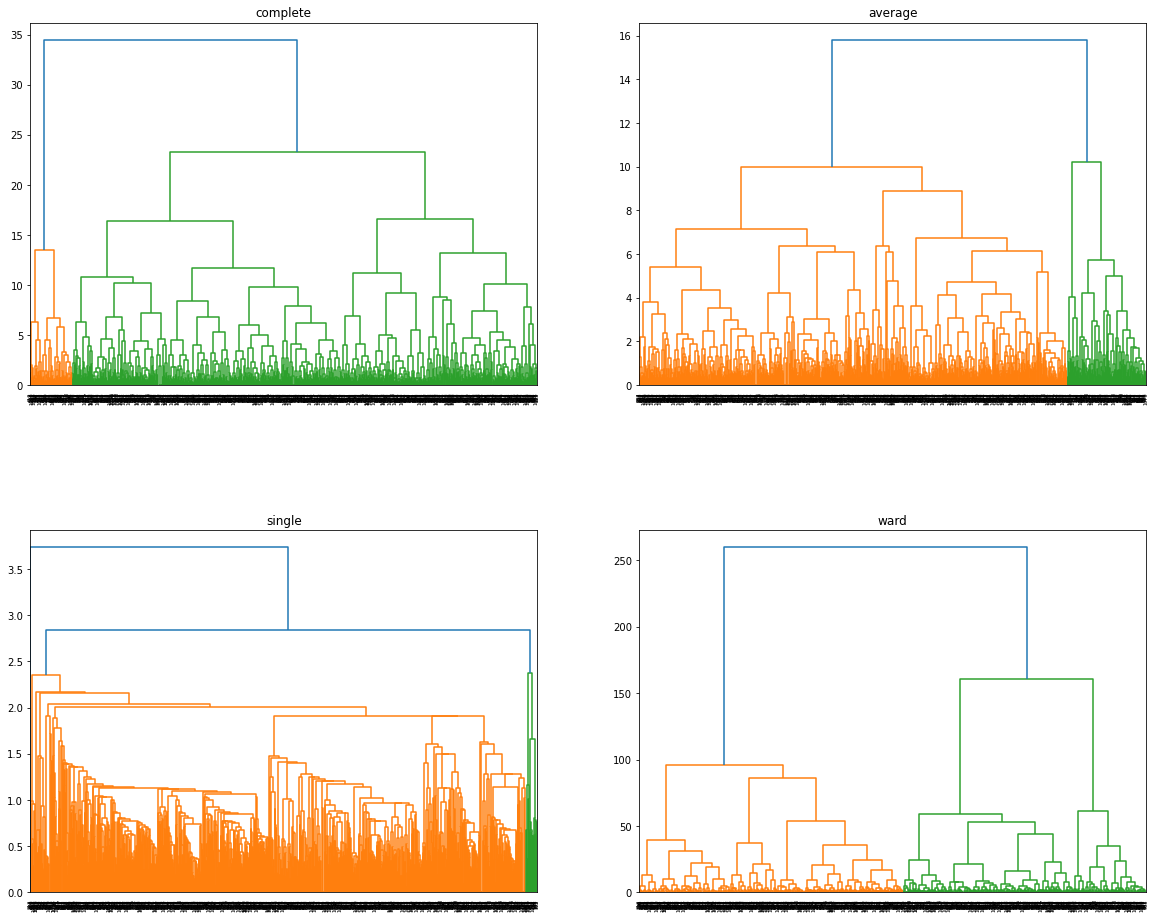

In [17]:
links = ['complete', 'average', 'single','ward']

fig, axes = plt.subplots(2, 2, figsize=(20, 16))
fig.subplots_adjust(hspace=0.4, wspace=0.2)
n = 4

for n, link in enumerate(links):
    i, j = divmod(n, 2)
    shc.dendrogram(shc.linkage(X_train, method=link), ax=axes[i, j])
    axes[i, j].set_title(link)

plt.show()

By taking a look at the dendrograms, make an educated guess about the number of classes that we have in the data. Justify your answer.

**Answer:**
Definitivamente los dendogramas anteriores nos confirman que contamos con 2 grupos en los datos (Naranjas y verdes), como podemos observar facilmente en el diagrama denominado 'ward', podemos observar facilmente los 2 grupos, que además poseen casi la misma cantidad de datos como se menciona al principio, y donde se les aprecia una gran disimilitud

## Creating the labels

Out of the clustering methods you tried before, pick the one you consider is the best one for creating the labels of the data. Do this in the following cell and store the labels in a variable named `y_train`.

In [18]:
#y_train = AgglomerativeClustering(linkage="ward",n_clusters=3).fit(X_train).labels_
clustering = KMeans(n_clusters=3, random_state=0)
y_train=clustering.fit_predict(X_train.values)
y_train

array([2, 0, 0, ..., 0, 0, 2])

Now load the `X_test.csv` file as a `Pandas` dataframe.

In [19]:
X_test = pd.read_csv('X_test.csv')
X_test.head()

,variance,skewness,kurtosis,entropy
0,0.64295,7.1018,0.34930,-0.41337
1,2.30660,3.5364,0.57551,0.41938
2,-3.57410,3.9440,-0.07912,-2.12030
3,3.95290,-2.3548,2.37920,0.48274
4,0.74307,11.1700,-1.38240,-4.07280


In the following cell of code repeat the process of creating the labels, but do this for `X_test`. Store these labels in a variable named `y_test`.

In [20]:
#y_test=AgglomerativeClustering(linkage="ward",n_clusters=3).fit(X_test).labels_
clustering = KMeans(n_clusters=3, random_state=0)
y_test=clustering.fit_predict(X_test.values)
y_test

array([1, 0, 1, 0, 1, 1, 0, 0, 2, 2, 0, 1, 0, 1, 1, 0, 1, 2, 1, 1, 1, 0,
       0, 0, 0, 2, 2, 1, 1, 0, 1, 0, 0, 1, 0, 0, 2, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 2, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 1, 2, 1, 1, 0, 0,
       1, 2, 0, 2, 1, 2, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 2, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 2, 1, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0,
       2, 1, 2, 1, 1, 2, 2, 2, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 2, 1, 0, 0,
       0, 1, 1, 0, 1, 2, 1, 1, 2, 2, 2, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 2, 1, 0, 1, 0, 2, 0, 0, 0,
       0, 2, 0, 0, 1, 0, 1, 0, 2, 1, 1, 1, 1, 0, 0, 1, 0, 0, 2, 0, 1, 0,
       1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 2, 0, 2, 1, 2, 1, 1, 0, 1, 0, 2, 2, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 2, 0, 0])

## Classification

At this point you should have labeled your data, so supervised learning can enter the room. You will train two machine learning models: **logistic regression** and **decision trees**. To do this, you will use the modules from `scikit-learn` known as `LogisticRegression` and `DecissionTreeClassifier`. Both methods can handle either binary or multiple classification, so if you think there are two groups in the data you will be doing binary classification, if you think thre are three or more you will perform multiple classification. For more information on these methods, click on the links below in the **references** section. 

In the following cell, write the code to train the `LogisticRegression` model.

In [21]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, max_iter=10000).fit(X_train, y_train)

Keep on the training but now with the `DecissionTreeClassifier` model.

In [22]:
from sklearn import tree
clf_tree = tree.DecisionTreeClassifier(random_state=0).fit(X_train,y_train)

## Evaluation

Evaluate the models that you trained in the previous section using a `confusion_matrix` and an `accuracy_score` as evaluation metric. Evaluate first the `LogisticRegression` model.

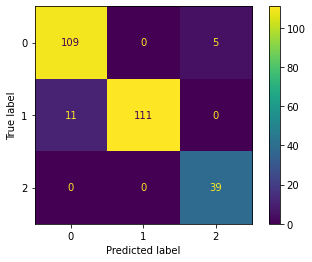

0.9418181818181818


In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
y_t=clf.predict(X_test)
cm = confusion_matrix(y_test,y_t, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

print(accuracy_score(y_test, y_t))


Same evaluation procedure for the `DecissionTreeClassifier` in the following cell.

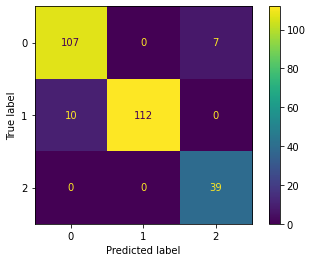

0.9381818181818182


In [24]:
y_t2=clf_tree.predict(X_test)
cm2 = confusion_matrix(y_test,y_t2, labels=clf_tree.classes_)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2,display_labels=clf_tree.classes_)
disp2.plot()
plt.show()

print(accuracy_score(y_test, y_t2))

## Conclusions

Analyze and interpret the results that were obtained in this section. 

**Final remarks:** Una "confussion matrix" nos sirve bastante para saber el desempeño que tuvo un modelo de machine learning predijendo y categorizando un conjunto de datos. En este caso, tanto el algoritmo de regresión logística como el clasificador con árboles de decisión tuvieron resultados muy buenos:
1. Regresión logística: Clasificó correctamente 109/114, 111/122 y 39/39, con un score general de **260/275**.
2. Clasificador de árboles de decisión: Clasificó correctamente 107/114, 112/122 y 39/39, con un score general de **259/275**.

Debido al gran parecido en el resultado de ambas pruebas es difícil suponer cuál es mejor que otra para un conjunto de datos de mayor escala, pero podemos apreciar que el de regresión logística acertó más que el de árboles de decisión por un resultado (lo cuál hace bastante poca diferencia).

Con 3 clusters, el desempeño parece ser bastante bueno.

## The End

If you got to this point, congratulations! Did you guess the number of clusters correctly? You will find out soon enough. I hope you enjoyed the course and learned a lot. For now, best of luck and enjoy the holidays. See you around. 

## References

[1] *Hastie, T., Tibshirani, R., Friedman, J. H., "The elements of statistical learning: data mining, inference, and prediction," New York, Springer, 2009.*

[2] https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

[3] https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier 

[4] https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html?highlight=confusion+matrix#sklearn.metrics.confusion_matrix

[5] https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score